In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

#load the ABCD_Features csv_Data
tile_df = pd.read_csv('features_test.csv')
tile_df 





Path    A1    A2       B1  \
0     Data_Image\ISIC_2019_Test_Input\ISIC_0034321  1.01  0.55   16.913   
1     Data_Image\ISIC_2019_Test_Input\ISIC_0034322  0.23  0.19   46.255   
2     Data_Image\ISIC_2019_Test_Input\ISIC_0034323  0.76  0.84   26.723   
3     Data_Image\ISIC_2019_Test_Input\ISIC_0034324  0.16  0.14   64.831   
4     Data_Image\ISIC_2019_Test_Input\ISIC_0034325  0.15  0.16   36.320   
...                                            ...   ...   ...      ...   
8233  Data_Image\ISIC_2019_Test_Input\ISIC_0073236  0.53  0.61   60.205   
8234  Data_Image\ISIC_2019_Test_Input\ISIC_0073243  0.09  0.09  247.132   
8235  Data_Image\ISIC_2019_Test_Input\ISIC_0073250  0.28  0.38   84.133   
8236  Data_Image\ISIC_2019_Test_Input\ISIC_0073252  0.01  0.01  206.429   
8237  Data_Image\ISIC_2019_Test_Input\ISIC_0073253  0.10  0.10  257.766   

         B2            B3  C  A_B     A_R  A_BG    A_DB    A_LB  A_W  \
0     0.063  1.941994e+08  2  0.0  0.0725   0.0  0.0000  0.1215    0   
1     0.469  7.099673e+07  2  0.0  0.0000   0.0  0.1248  0.0000    0   
2     0.084  4.245563e+08  0  0.0  0.0000   0.0  0.0000  0.0000    0   
3     0.712  8.492888e+07  2  0.0  0.0052   0.0  0.0000  0.1128    0   
4     0.697  1.558538e+07  3  0.0  0.0063   0.0  0.3074  0.0049    0   
...     ...           ... ..  ...     ...   ...     ...     ...  ...   
8233  0.129  2.063939e+09  2  0.0  0.2487   0.0  0.0570  0.0000    0   
8234  0.848  3.316228e+09  3  0.0  0.0040   0.0  0.0905  0.0805    0   
8235  0.318  9.287086e+08  3  0.0  0.0324   0.0  0.1529  0.0880    0   
8236  0.892  1.745139e+09  3  0.0  0.0268   0.0  0.1191  0.0956    0   
8237  0.877  3.514013e+09  3  0.0  0.0497   0.0  0.1749  0.3649    0   

            D1   D2  
0      316.065    2  
1      291.559  246  
2      396.132   26  
3      318.186  198  
4      182.274   71  
...        ...  ...  
8233   743.971  166  
8234  1093.557   13  
8235   640.539  257  
8236   875.594   12  
8237  1130.905    4  

[8238 rows x 15 columns]

In [2]:
# Load in all of the images into memory - this will take a while
tile_df['image_RGB'] = tile_df['Path'].map(lambda x: np.asarray(Image.open(x+'.jpg').resize((600,450))))


In [3]:
#After analysing only the ABCD features with the correlation matrix i realised that i need more features for a better Prediction
#For more efficient color Chanel analysis i wanted to combine this festures extraction method with the The Method_C Algorithm
#By doing so i must start again my features extraction algorithm including this lines in the C_Method algorithm which takes long time  
#Method_C_Algorithm make a segmentation of the lesion to extract only the colors contour of lesion without including the skin and other irrelevant contours
#Unfortunetly Due to the limited resources (Computer_Performance and especially working alone on the Phase 1) i implemented this color chanel analysis without preprocessing and Segmention like the ABCD_Method  
#Color channel analysis

rgb_info_df = tile_df.apply(lambda x: pd.Series({'{}_mean'.format(k): v for k, v in 
                                  zip(['Red', 'Green', 'Blue'], 
                                      np.mean(x['image_RGB'], (0, 1)))}),1)
gray_col_vec = rgb_info_df.apply(lambda x: np.mean(x), 1)
for c_col in rgb_info_df.columns:
    rgb_info_df[c_col] = rgb_info_df[c_col]/gray_col_vec
rgb_info_df['Gray_mean'] = gray_col_vec
rgb_info_df.sample(10)

Red_mean  Green_mean  Blue_mean   Gray_mean
7959  1.013632    1.001557   0.984811   78.419651
6931  1.257061    0.966653   0.776286  126.740781
6574  1.029278    0.980932   0.989790  144.635765
1160  1.211559    0.867266   0.921175  161.341246
3858  1.019840    0.998928   0.981233  175.647085
5688  1.057185    0.994336   0.948478  160.722800
911   1.301339    0.844113   0.854548  154.452843
6944  1.149388    0.916199   0.934413  167.933517
2182  1.182616    0.900608   0.916776   99.838048
3620  1.078776    0.940723   0.980501  144.902193

In [7]:
for c_col in rgb_info_df.columns:
    tile_df[c_col] = rgb_info_df[c_col].values
df_features= tile_df.drop(['image_RGB'],axis=1)
df_features_sorted = df_features.sort_values(by=['Path'])
df_features_sorted= df_features_sorted.reset_index(drop=True)
df_features_sorted

#Save new features as csv: test
df_features_sorted.to_csv('all_new_test_features.csv', index=False)

In [12]:
# Preparing the Training Data Set: Kategory with features

df_combined = pd.read_csv('Training_val.csv')
df_combined_Y= df_combined.drop(['image','MEL','NV','BCC','AK','BKL','DF','VASC','SCC','UNK'],axis=1)
df_combined_Y_sorted = df_combined_Y.sort_values(by=['Path'])
df_combined_Y_sorted= df_combined_Y_sorted.reset_index(drop=True)
df_combined_Y_sorted

Path  category
0      Data_Image\ISIC_2019_Training_Input\ISIC_0000000         1
1      Data_Image\ISIC_2019_Training_Input\ISIC_0000001         1
2      Data_Image\ISIC_2019_Training_Input\ISIC_0000002         0
3      Data_Image\ISIC_2019_Training_Input\ISIC_0000003         1
4      Data_Image\ISIC_2019_Training_Input\ISIC_0000006         1
...                                                 ...       ...
23179          Data_Image\Out_Distribution\ISIC_0012012         8
23180          Data_Image\Out_Distribution\ISIC_0012013         8
23181          Data_Image\Out_Distribution\ISIC_0012014         8
23182          Data_Image\Out_Distribution\ISIC_0012015         8
23183          Data_Image\Out_Distribution\ISIC_0012016         8

[23184 rows x 2 columns]

In [13]:
#split the features into Validation and Training
#Features for Training (Groundtruth+Out_Distribution)

merged_Frame_Training = pd.merge(df_features_sorted,df_combined_Y_sorted, left_on = 'Path',right_on='Path', how='inner')
merged_Frame_Training 


Path    A1    A2       B1  \
0      Data_Image\ISIC_2019_Training_Input\ISIC_0000000  0.24  0.16  118.721   
1      Data_Image\ISIC_2019_Training_Input\ISIC_0000001  0.11  0.13   53.048   
2      Data_Image\ISIC_2019_Training_Input\ISIC_0000002  1.67  1.94   69.230   
3      Data_Image\ISIC_2019_Training_Input\ISIC_0000003  0.14  0.22  109.961   
4      Data_Image\ISIC_2019_Training_Input\ISIC_0000006  6.19  7.46   46.604   
...                                                 ...   ...   ...      ...   
23179          Data_Image\Out_Distribution\ISIC_0012012  2.50  2.31   59.831   
23180          Data_Image\Out_Distribution\ISIC_0012013  2.59  2.61   47.736   
23181          Data_Image\Out_Distribution\ISIC_0012014  0.81  1.23  136.023   
23182          Data_Image\Out_Distribution\ISIC_0012015  0.78  1.11  139.530   
23183          Data_Image\Out_Distribution\ISIC_0012016  0.66  0.22   81.422   

          B2            B3  C  A_B     A_R  A_BG    A_DB    A_LB  A_W  \
0      0.572  8.066679e+08  3  0.0  0.0000   0.0  0.0459  0.0099    0   
1      0.679  5.117080e+07  2  0.0  0.0036   0.0  0.1102  0.0000    0   
2      0.341  4.506837e+08  1  0.0  0.0000   0.0  0.0000  0.1308    0   
3      0.634  5.217377e+08  3  0.0  0.1400   0.0  0.1480  0.0825    0   
4      0.632  4.007178e+07  3  0.0  0.1124   0.0  0.1854  0.1015    0   
...      ...           ... ..  ...     ...   ...     ...     ...  ...   
23179  0.262  4.925914e+08  2  0.0  0.1837   0.0  0.0000  0.0657    0   
23180  0.178  5.417026e+08  2  0.0  0.1836   0.0  0.0000  0.0936    0   
23181  0.775  6.615693e+08  2  0.0  0.0586   0.0  0.0744  0.0000    0   
23182  0.808  6.564187e+08  2  0.0  0.1431   0.0  0.1131  0.0000    0   
23183  0.175  2.790865e+09  3  0.0  0.3286   0.0  0.1015  0.5123    0   

            D1   D2  Red_mean  Green_mean  Blue_mean   Gray_mean  category  
0      650.106  291  0.877700    0.987223   1.135076  150.436421         1  
1      261.780   28  1.009823    0.984349   1.005827  164.965028         1  
2      767.369   25  0.860924    0.953757   1.185319  158.560457         0  
3      570.370   57  1.067656    0.989026   0.943318  178.594970         1  
4      645.034   19  0.895807    0.984453   1.119740  150.231953         1  
...        ...  ...       ...         ...        ...         ...       ...  
23179  803.014   49  1.308856    0.903104   0.788040  151.960447         8  
23180  801.994   69  1.283592    0.914512   0.801896  157.625830         8  
23181  794.260   61  1.100210    0.900955   0.998835  121.799525         8  
23182  788.125   69  1.083467    0.899980   1.016553  121.006680         8  
23183  779.784    5  1.052789    0.939944   1.007267  132.015325         8  

[23184 rows x 20 columns]

In [14]:
#Features for Validation (Groudtruth_val)
df_val = pd.read_csv('Val.csv')
df_val_Y = df_val.drop(['image','MEL','NV','BCC','AK','BKL','DF','VASC','SCC','UNK'],axis=1)
df_val_Y_sorted = df_val_Y.sort_values(by=['Path'])
df_val_Y_sorted= df_val_Y_sorted.reset_index(drop=True)

#df_val_Y_sorted
merged_Frame_val = pd.merge(df_features_sorted,df_val_Y_sorted, left_on = 'Path',right_on='Path', how='inner')
merged_Frame_val

Path    A1    A2       B1  \
0      Data_Image\ISIC_2019_Training_Input\ISIC_0000004  0.04  0.04  155.974   
1      Data_Image\ISIC_2019_Training_Input\ISIC_0000009  2.47  2.40   75.535   
2      Data_Image\ISIC_2019_Training_Input\ISIC_0000013  0.09  0.11   98.638   
3     Data_Image\ISIC_2019_Training_Input\ISIC_00000...  2.71  4.11   56.783   
4     Data_Image\ISIC_2019_Training_Input\ISIC_00000...  2.17  1.58   76.103   
...                                                 ...   ...   ...      ...   
2569           Data_Image\Out_Distribution\ISIC_0024202  0.22  0.35   58.771   
2570           Data_Image\Out_Distribution\ISIC_0024203  0.42  0.41   79.487   
2571           Data_Image\Out_Distribution\ISIC_0024204  0.46  0.52   44.117   
2572           Data_Image\Out_Distribution\ISIC_0024205  0.64  1.05   32.880   
2573           Data_Image\Out_Distribution\ISIC_0024206  0.54  0.27   39.811   

         B2            B3  C     A_B     A_R  A_BG    A_DB    A_LB  A_W  \
0     0.888  7.606923e+08  2  0.0000  0.1230   0.0  0.0000  0.1291    0   
1     0.454  3.307178e+08  2  0.0000  0.1071   0.0  0.0000  0.1326    0   
2     0.704  3.060851e+08  4  0.0486  0.0036   0.0  0.0680  0.0349    0   
3     0.413  1.691476e+08  2  0.0000  0.2648   0.0  0.0000  0.0317    0   
4     0.351  5.643014e+08  1  0.0000  0.3560   0.0  0.0000  0.0000    0   
...     ...           ... ..     ...     ...   ...     ...     ...  ...   
2569  0.487  1.350170e+08  3  0.0000  0.0753   0.0  0.1115  0.0762    0   
2570  0.226  1.551986e+09  0  0.0000  0.0000   0.0  0.0000  0.0000    0   
2571  0.114  1.035418e+09  0  0.0000  0.0000   0.0  0.0000  0.0000    0   
2572  0.176  1.822378e+08  3  0.0000  0.1369   0.0  0.0793  0.0697    0   
2573  0.157  4.027610e+08  1  0.0000  0.0000   0.0  0.0000  0.2056    0   

           D1   D2  Red_mean  Green_mean  Blue_mean   Gray_mean  category  
0     663.374    5  1.134925    0.860263   1.004812   80.415201         0  
1     766.049   89  1.052239    0.977185   0.970575  156.058530         1  
2     476.928  145  1.032785    0.983354   0.983861  182.622596         0  
3     681.873   23  1.065242    0.979017   0.955741  154.859858         1  
4     784.585  149  1.096276    0.930364   0.973360  149.032542         0  
...       ...  ...       ...         ...        ...         ...       ...  
2569  353.139  129  1.029830    0.992309   0.977861  188.072835         8  
2570  721.115  215  1.085321    0.903090   1.011590  204.041210         8  
2571  563.079  143  1.140261    0.876188   0.983550  193.169993         8  
2572  385.720  225  1.018854    1.003837   0.977308  180.430780         8  
2573  430.514  279  1.168562    0.776054   1.055384  168.486567         8  

[2574 rows x 20 columns]

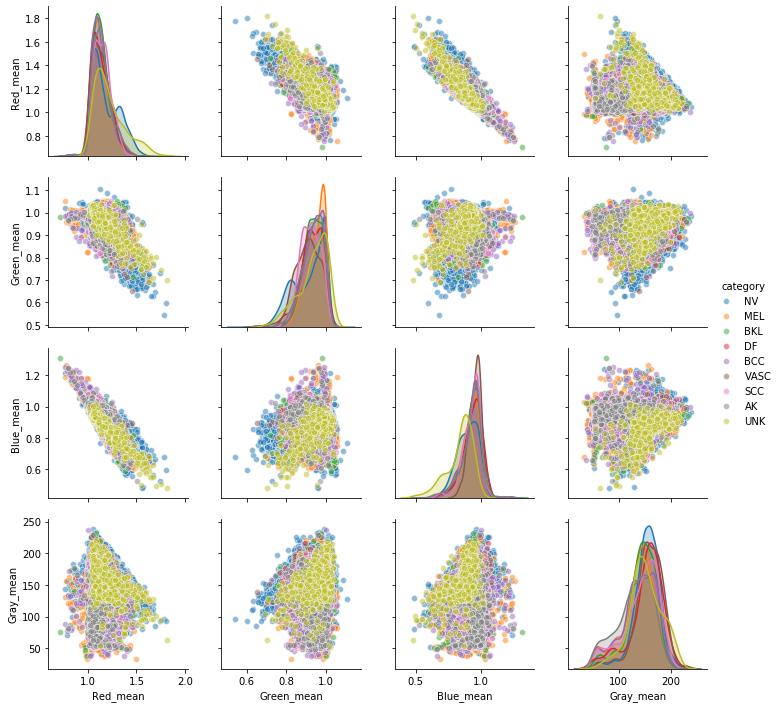

In [22]:
#Distribution of the color chanel analysis
merged_Frame_Training_Graph =  merged_Frame_Training.copy()
merged_Frame_Training_Graph = merged_Frame_Training_Graph.replace({'category': {0:'MEL',1:'NV',2:'BCC',3:'AK',4:'BKL',5:'DF',6:'VASC',7:'SCC',8:'UNK'}})

#merged_Frame_Training_Graph
sns.pairplot(merged_Frame_Training_Graph[['Red_mean', 'Green_mean', 'Blue_mean', 'Gray_mean','category']], 
            hue='category', plot_kws = {'alpha': 0.5})

In [23]:
#Save all new features including the Color Chanel Analysis as csv: val+Train+out_dis
df_features_sorted.to_csv('all_new_features.csv', index=False)